In [3]:
import pandas as pd
df = pd.read_csv("C:\\Users\\Saher\\Downloads\\INFY.csv")

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-03-11,0.583984,0.781250,0.583984,0.732422,0.490145,172512000
1,1999-03-12,0.734375,0.761719,0.671875,0.728516,0.487531,39897600
2,1999-03-15,0.730469,0.730469,0.658203,0.662109,0.443090,12672000
3,1999-03-16,0.667969,0.691406,0.656250,0.656250,0.439170,9984000
4,1999-03-17,0.656250,0.699219,0.652344,0.660156,0.441783,15449600
...,...,...,...,...,...,...,...
6122,2023-07-11,16.260000,16.280001,16.150000,16.240000,16.240000,7631500
6123,2023-07-12,16.260000,16.290001,16.030001,16.070000,16.070000,7102600
6124,2023-07-13,16.580000,16.850000,16.580000,16.790001,16.790001,13295300
6125,2023-07-14,17.160000,17.200001,16.990000,17.040001,17.040001,11539700


In [5]:
df = df[['Date','Close']]
df

,Date,Close
0,1999-03-11,0.732422
1,1999-03-12,0.728516
2,1999-03-15,0.662109
3,1999-03-16,0.656250
4,1999-03-17,0.660156
...,...,...
6122,2023-07-11,16.240000
6123,2023-07-12,16.070000
6124,2023-07-13,16.790001
6125,2023-07-14,17.040001


In [6]:
df['Date']

0       1999-03-11
1       1999-03-12
2       1999-03-15
3       1999-03-16
4       1999-03-17
           ...    
6122    2023-07-11
6123    2023-07-12
6124    2023-07-13
6125    2023-07-14
6126    2023-07-17
Name: Date, Length: 6127, dtype: object

In [7]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1999-03-11')
datetime_object

datetime.datetime(1999, 3, 11, 0, 0)

In [8]:
import warnings
warnings.filterwarnings('ignore')
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      1999-03-11
1      1999-03-12
2      1999-03-15
3      1999-03-16
4      1999-03-17
          ...    
6122   2023-07-11
6123   2023-07-12
6124   2023-07-13
6125   2023-07-14
6126   2023-07-17
Name: Date, Length: 6127, dtype: datetime64[ns]

In [9]:
#making date column the index

df.index = df.pop('Date')
df

,Close
Date,
1999-03-11,0.732422
1999-03-12,0.728516
1999-03-15,0.662109
1999-03-16,0.656250
1999-03-17,0.660156
...,...
2023-07-11,16.240000
2023-07-12,16.070000
2023-07-13,16.790001


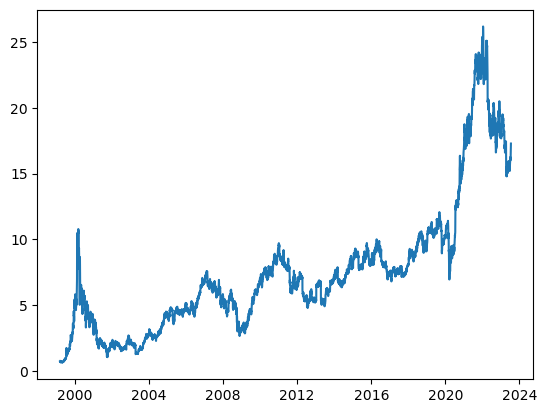

In [10]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [11]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str) # Convert first date string to datetime
  last_date  = str_to_datetime(last_date_str) # Convert last date string to datetime

  target_date = first_date # Current date is target date

  dates = [] # To store target dates
  X, Y = [], [] # X to store 3 values and y to store the current dates value

  last_time = False # Some flag
  while True: # Iterates indefinately unless stopped
    df_subset = dataframe.loc[:target_date].tail(n+1) # Includes last n+1 rows(When n=3, 3 above rows and 1 itself)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      print(len(df_subset))
      return

    values = df_subset['Close'].to_numpy() # 'Close' column windowed(df_subset) 
    x, y = values[:-1], values[-1] # Split into X(all columns excpet last) and y(last column)

    dates.append(target_date) # Appending dates
    X.append(x) # Appending input data
    Y.append(y) # Appending output data

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)] # Extracts next week starting from target date
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0]) # Extracts 2nd date of next week in string format which will be the next date
    next_date_str = next_datetime_str.split('T')[0] # Seperating date and time
    year_month_day = next_date_str.split('-') # Process of converting string to datetime
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date: # Stop at last date
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates # Making dates column
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i] # Making Target 3,2,1 
  
  ret_df['Target'] = Y # Making Target column

  return ret_df

# Start day second time around: '2022-07-19'
windowed_df = df_to_windowed_df(df, 
                                '2021-07-22', 
                                '2023-07-17', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-07-22,20.639999,20.940001,21.309999,21.330000
1,2021-07-23,20.940001,21.309999,21.330000,21.730000
2,2021-07-26,21.309999,21.330000,21.730000,21.709999
3,2021-07-27,21.330000,21.730000,21.709999,21.709999
4,2021-07-28,21.730000,21.709999,21.709999,21.850000
...,...,...,...,...,...
494,2023-07-11,16.070000,16.049999,16.010000,16.240000
495,2023-07-12,16.049999,16.010000,16.240000,16.070000
496,2023-07-13,16.010000,16.240000,16.070000,16.790001
497,2023-07-14,16.240000,16.070000,16.790001,17.040001


In [12]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((499,), (499, 3, 1), (499,))

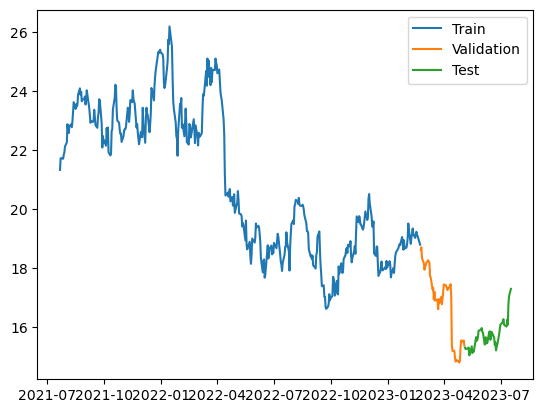

In [13]:
q_60 = int(len(dates) * .6)
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)


dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [14]:
print(X_train.shape)

(399, 3, 1)


In [15]:
print(y_train.shape)

(399,)


In [16]:
print(dates_train.shape)

(399,)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# model = Sequential([
#     layers.Input((3, 1)),
#     layers.LSTM(64, return_sequences=True),  # Set return_sequences to True for LSTM layers before dropout
#     layers.Dropout(0.2),  # Add dropout after LSTM layer
#     layers.Dense(32, activation='relu'),
#     layers.Dropout(0.2),  # Add dropout after the first Dense layer
#     layers.Dense(32, activation='relu'),
#     layers.Dropout(0.2),  # Add dropout after the second Dense layer
#     layers.Dense(1)
# ])

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

# early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

# model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
13/13 [==============================] - 4s 65ms/step - loss: 397.2225 - mean_absolute_error: 19.7745 - val_loss: 217.8729 - val_mean_absolute_error: 14.7123
Epoch 2/100
13/13 [==============================] - 0s 13ms/step - loss: 325.1703 - mean_absolute_error: 17.8505 - val_loss: 146.7425 - val_mean_absolute_error: 12.0529
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 214.4158 - mean_absolute_error: 14.3601 - val_loss: 49.2356 - val_mean_absolute_error: 6.9054
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 73.3824 - mean_absolute_error: 7.8053 - val_loss: 4.3976 - val_mean_absolute_error: 1.7140
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 10.4864 - mean_absolute_error: 2.6881 - val_loss: 51.3217 - val_mean_absolute_error: 7.0638
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 10.3074 - mean_absolute_error: 2.6892 - val_loss: 20.5280 - val_mean_absolute_error: 4.3720

Epoch 51/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1472 - mean_absolute_error: 0.2965 - val_loss: 0.2505 - val_mean_absolute_error: 0.3596
Epoch 52/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1503 - mean_absolute_error: 0.3012 - val_loss: 0.4854 - val_mean_absolute_error: 0.6043
Epoch 53/100
13/13 [==============================] - 0s 8ms/step - loss: 0.2035 - mean_absolute_error: 0.3548 - val_loss: 0.2600 - val_mean_absolute_error: 0.3723
Epoch 54/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1692 - mean_absolute_error: 0.3209 - val_loss: 0.1678 - val_mean_absolute_error: 0.2842
Epoch 55/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1963 - mean_absolute_error: 0.3469 - val_loss: 0.3790 - val_mean_absolute_error: 0.5001
Epoch 56/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1424 - mean_absolute_error: 0.2953 - val_loss: 0.2402 - val_mean_absolute_error: 0.3508
Epoch 57/100
13/

13/13 [==============================] - 1s 3ms/step
(399,)


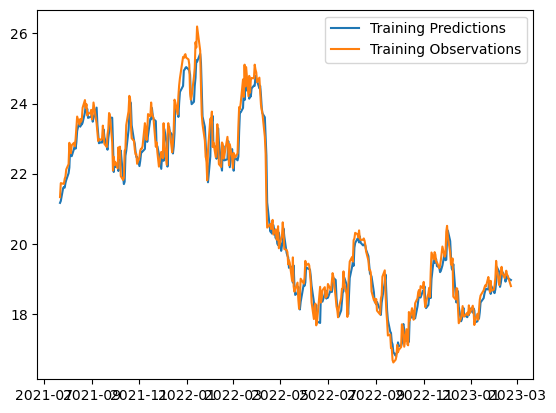

In [18]:
train_predictions = model.predict(X_train).flatten()
print(train_predictions.shape)

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 2ms/step


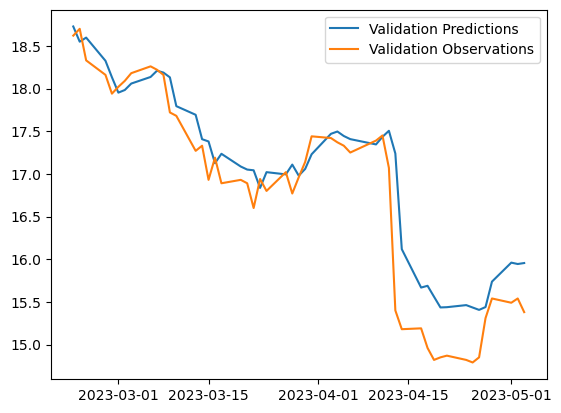

In [19]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 0s/step


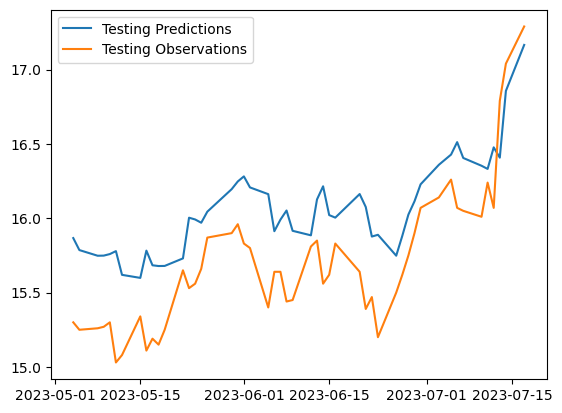

In [20]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

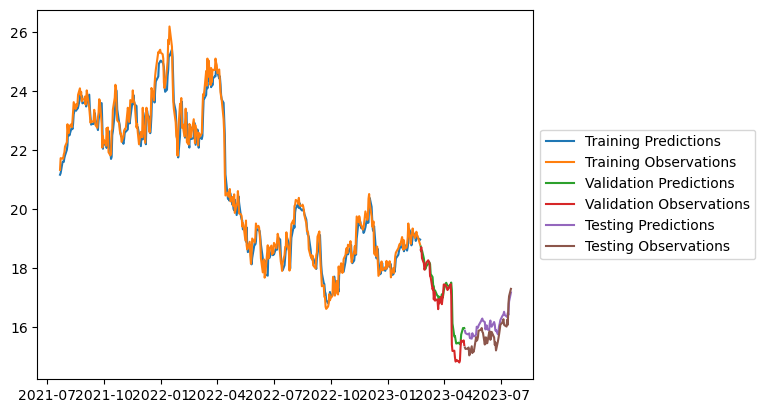

In [21]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'],loc='center left', bbox_to_anchor=(1, 0.5))

In [22]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])
last_window = deepcopy(X_train[-1])
# print(last_window)

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    for i in range(2):
        last_window[i] = last_window[i+1]
    last_window[2] = next_prediction
#     print(last_window)


1/1 [==============================] - 0s 23ms/step


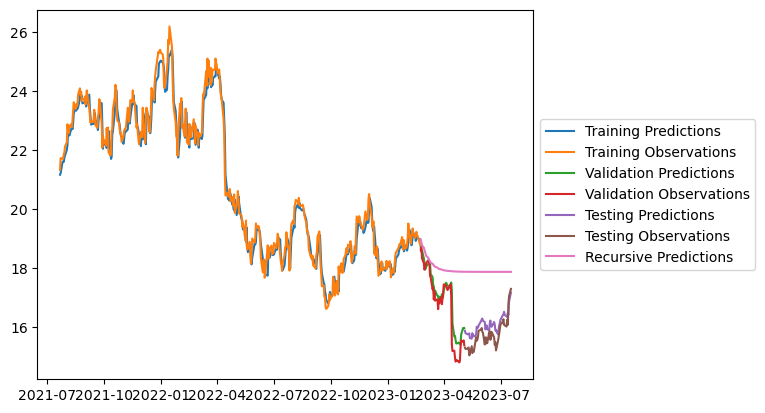

In [23]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'],loc='center left', bbox_to_anchor=(1, 0.5))